In [3]:
import pandas as pd
import numpy as np

In [5]:
iot_df = pd.read_csv("/Users/badershalata/Documents/Applying DS/merged_IoT_dataset.csv")

/var/folders/xq/mk_9dpc14877s8mzs6300hv80000gn/T/ipykernel_79270/356943682.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  iot_df = pd.read_csv("/Users/badershalata/Documents/Applying DS/merged_IoT_dataset.csv")


In [6]:
iot_df

,Unnamed: 0,ID,id.orig_p,id.resp_p,proto,service,timestamp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,ip_src,ip_dst,flow_PSH_flag_count,flow_URG_flag_count,flow_pkts_size.avg,fwd_pkts_size.avg,bwd_pkts_size.avg,fwd_pkts_size.min,Traffic_type,Attack_type
0,14300,1793,55963,53,udp,dns,2025-04-23 13:40:04.211896000,0.002543,4,4,...,-,-,0,0,52.000000,41.600000,41.600000,52,Malicious,ARP_poisioning
1,17933,5426,47889,443,udp,-,2025-04-24 08:01:47.690113000,58.251422,14,17,...,-,-,0,0,272.516129,261.066667,251.777778,39,Malicious,ARP_poisioning
2,14223,1716,44573,53,udp,dns,2025-04-23 13:39:02.266079000,0.056763,2,2,...,-,-,0,0,81.000000,43.333333,64.666667,65,Malicious,ARP_poisioning
3,15134,2627,41289,53,udp,dns,2025-04-23 13:56:57.914420000,0.000173,2,2,...,-,-,0,0,57.000000,35.333333,40.666667,53,Malicious,ARP_poisioning
4,16751,4244,34944,5353,udp,dns,2025-04-23 13:25:09.418788000,0.000000,1,0,...,-,-,0,0,48.000000,24.000000,0.000000,48,Malicious,ARP_poisioning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621079,701040,192.168.137.163-47.254.83.84-53458-8877-17,53458,8877,udp,-,2023-02-14 11:55:22.000000540,20.545842,3,1,...,192.168.137.163,47.254.83.84,0,0,54.000000,38.666667,16.000000,8,Malicious,XSS.pcap_Flow
621080,700115,192.168.137.254-192.168.137.1-59686-53-17,59686,53,udp,-,2023-02-14 12:21:29.000000630,0.019303,1,1,...,192.168.137.254,192.168.137.1,0,0,103.000000,37.000000,132.000000,8,Malicious,XSS.pcap_Flow
621081,699872,192.168.137.129-192.168.137.1-58801-53-17,58801,53,udp,-,2023-02-14 12:13:05.000000070,0.038042,1,1,...,192.168.137.129,192.168.137.1,0,0,80.000000,28.000000,104.000000,8,Malicious,XSS.pcap_Flow
621082,701132,192.168.137.206-3.221.182.58-21506-32100-17,21506,32100,udp,-,2023-02-14 11:56:01.000000380,0.080826,1,1,...,192.168.137.206,3.221.182.58,0,0,14.000000,4.000000,20.000000,8,Malicious,XSS.pcap_Flow


In [7]:
# Packet ratio

iot_df['flow_pkts_tot'] = (iot_df['flow_pkts_per_sec'] * iot_df['flow_duration']).astype('int64')
iot_df['fwd_bwd_pkts_ratio'] = iot_df['fwd_pkts_tot'] / (iot_df['bwd_pkts_tot'] + 1)

# Fraction of data

iot_df['fwd_data_pkts_share'] = iot_df['fwd_data_pkts_tot'] / (iot_df['fwd_pkts_tot'] + 1)
iot_df['bwd_data_pkts_share'] = iot_df['bwd_data_pkts_tot'] / (iot_df['bwd_pkts_tot'] + 1)

# Header size ratios

iot_df['fwd_header_data_ratio'] = iot_df['fwd_header_size_tot'] / (iot_df['fwd_pkts_payload.tot'] + 1)
iot_df['bwd_header_data_ratio'] = iot_df['bwd_header_size_tot'] / (iot_df['fwd_pkts_payload.tot'] + 1)

iot_df['fwd_header_size_avg'] = iot_df['fwd_header_size_tot'] / (iot_df['fwd_pkts_tot'] + 1)
iot_df['bwd_header_size_avg'] = iot_df['bwd_header_size_tot'] / (iot_df['bwd_pkts_tot'] + 1)

iot_df[['fwd_bwd_header_size_ratio', 'fwd_bwd_header_size_min_ratio', 'fwd_bwd_header_size_max_ratio']] = \
    iot_df[['fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max']] / \
            (iot_df[['bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max']].values + 1)

iot_df = iot_df.copy()

# Session flag exhange structure

iot_df['flow_flag_count'] = iot_df[['flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
                                    'flow_ACK_flag_count', 'flow_CWR_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count',
                                    'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_ECE_flag_count']].sum(axis = 1)
iot_df['flow_flags_per_packets'] = iot_df['flow_flag_count'] / (iot_df['fwd_pkts_tot'] + iot_df['bwd_pkts_tot'] + 1)

iot_df[['flow_FIN_flag_share', 'flow_SYN_flag_share', 'flow_RST_flag_share',
           'flow_ACK_flag_share', 'flow_CWR_flag_share', 'flow_ECE_flag_count']] = iot_df[['flow_FIN_flag_count', 'flow_SYN_flag_count', \
              'flow_RST_flag_count', 'flow_ACK_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count']] / \
                    (np.expand_dims(iot_df['flow_flag_count'].to_numpy() + 1, axis = 1))

iot_df['flow_PSH_flag_share'] = iot_df[['fwd_PSH_flag_count', 'bwd_PSH_flag_count']].sum(axis = 1) / (iot_df['flow_flag_count'] + 1)
iot_df['flow_URG_flag_share'] = iot_df[['fwd_URG_flag_count', 'bwd_URG_flag_count']].sum(axis = 1) / (iot_df['flow_flag_count'] + 1)

iot_df['flow_FIN_ACK_ratio'] = iot_df['flow_FIN_flag_count'] / (iot_df['flow_ACK_flag_count'] + 1)
iot_df['flow_SYN_RST_ratio'] = iot_df['flow_SYN_flag_count'] / (iot_df['flow_RST_flag_count'] + 1)
iot_df['fwd_bwd_PSH_ratio'] = iot_df['fwd_PSH_flag_count'] / (iot_df['bwd_PSH_flag_count'] + 1)
iot_df['fwd_bwd_URG_ratio'] = iot_df['fwd_URG_flag_count'] / (iot_df['bwd_URG_flag_count'] + 1)

iot_df = iot_df.copy()

# Packet payload size

iot_df[['fwd_bwd_payload_size_min_ratio', 'fwd_bwd_payload_size_max_ratio', 'fwd_bwd_payload_size_ratio',
            'fwd_bwd_payload_size_avg_ratio', 'fwd_bwd_payload_size_std_ratio']] = \
    iot_df[['fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std']] / \
        (iot_df[['bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
                    'bwd_pkts_payload.std']].values + 1)

iot_df[['fwd_PSH_payload_per_flag', 'bwd_PSH_payload_per_flag']] = iot_df[['fwd_pkts_payload.avg', 'bwd_pkts_payload.avg']] / \
                                                                       (iot_df[['fwd_PSH_flag_count', 'bwd_PSH_flag_count']].values + 1)

iot_df = iot_df.copy()

# Inter-arrival time

iot_df[['fwd_payload_per_iat', 'bwd_payload_per_iat']] = iot_df[['fwd_pkts_payload.avg', 'bwd_pkts_payload.avg']] / \
                                                                        (iot_df[['fwd_iat.avg', 'bwd_iat.avg']].values + 1)

# Subflow and bulk

iot_df[['fwd_bwd_subflow_pkts_ratio', 'fwd_bwd_subflow_bytes_ratio', 'fwd_bwd_bulk_bytes_ratio',
        'fwd_bwd_bulk_packets_ratio', 'fwd_bwd_bulk_rate_ratio']] = \
    iot_df[['fwd_subflow_pkts', 'fwd_subflow_bytes', 'fwd_bulk_bytes', 'fwd_bulk_packets', 'fwd_bulk_rate']] / \
        (iot_df[['bwd_subflow_pkts', 'bwd_subflow_bytes', 'bwd_bulk_bytes', 'bwd_bulk_packets', 'bwd_bulk_rate']].values + 1)

iot_df[['fwd_subflow_pkts_share', 'fwd_subflow_bytes_share', 'fwd_bulk_bytes_share', 'fwd_bulk_packets_share', 'bwd_subflow_pkts_share',
            'bwd_subflow_bytes_share', 'bwd_bulk_bytes_share', 'bwd_bulk_packets_share']] = \
    iot_df[['fwd_subflow_pkts', 'fwd_subflow_bytes', 'fwd_bulk_bytes', 'fwd_bulk_packets', 'bwd_subflow_pkts',
            'bwd_subflow_bytes', 'bwd_bulk_bytes', 'bwd_bulk_packets']] / \
        (iot_df[['fwd_pkts_tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.avg', 'fwd_pkts_tot', 
                'bwd_pkts_tot', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.avg', 'fwd_pkts_tot']].values + 1)

iot_df = iot_df.copy()

# Active | Idle times

iot_df[['active_events', 'idle_events']] = \
    iot_df[['active.tot', 'idle.tot']] / (iot_df[['active.avg', 'idle.avg']].values + 1)

iot_df[['active_cycle']] = \
    iot_df[['active.tot']] / (np.expand_dims(iot_df[['active.tot', 'idle.tot']].sum(axis = 1) + 1, axis = 1))

iot_df = iot_df.copy()

# Window size

iot_df[['fwd_init_window_size_payload', 'bwd_init_window_size_payload', 'fwd_last_window_size_payload']] = \
    iot_df[['fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size']] / \
        (iot_df[['fwd_pkts_payload.avg', 'bwd_pkts_payload.avg', 'fwd_pkts_payload.avg']].values + 1)

iot_df['fwd_bwd_window_size'] = iot_df['fwd_init_window_size'] / (iot_df['bwd_init_window_size'] + 1)

iot_df['window_size_pos_change'] = np.where(iot_df['fwd_last_window_size'] - iot_df['fwd_init_window_size'] >= 0,
                                iot_df['fwd_last_window_size'] - iot_df['fwd_init_window_size'], 0) / (iot_df['fwd_init_window_size'] + 1)
iot_df['window_size_neg_change'] = np.where(iot_df['fwd_last_window_size'] - iot_df['fwd_init_window_size'] < 0,
                                iot_df['fwd_last_window_size'] - iot_df['fwd_init_window_size'], 0) / (iot_df['fwd_init_window_size'] + 1)

iot_df = iot_df.copy()

# Skewness, Kurtosis and Range

iot_df['fwd_pkts_payload_skewness'] = \
    (iot_df['fwd_pkts_payload.max'] - iot_df['fwd_pkts_payload.avg']) / (iot_df['fwd_pkts_payload.std'] + 1)
iot_df['bwd_pkts_payload_skewness'] = \
    (iot_df['bwd_pkts_payload.max'] - iot_df['bwd_pkts_payload.avg']) / (iot_df['bwd_pkts_payload.std'] + 1)
iot_df['flow_pkts_payload_skewness'] = \
    (iot_df['flow_pkts_payload.max'] - iot_df['flow_pkts_payload.avg']) / (iot_df['flow_pkts_payload.std'] + 1)
iot_df['fwd_iat_skewness'] = (iot_df['fwd_iat.max'] - iot_df['fwd_iat.avg']) / (iot_df['fwd_iat.std'] + 1)
iot_df['bwd_iat_skewness'] = (iot_df['bwd_iat.max'] - iot_df['bwd_iat.avg']) / (iot_df['bwd_iat.std'] + 1)
iot_df['flow_iat_skewness'] = (iot_df['flow_iat.max'] - iot_df['flow_iat.avg']) / (iot_df['flow_iat.std'] + 1)
iot_df['active_skewness'] = (iot_df['active.max'] - iot_df['active.avg']) / (iot_df['active.std'] + 1)
iot_df['idle_skewness'] = (iot_df['idle.max'] - iot_df['idle.avg']) / (iot_df['idle.std'] + 1)

iot_df = iot_df.copy()

iot_df['fwd_pkts_payload_kurtosis'] = \
    ((iot_df['fwd_pkts_payload.max'] - iot_df['fwd_pkts_payload.avg'])**4) / ((iot_df['fwd_pkts_payload.std']**4) + 1)
iot_df['bwd_pkts_payload_kurtosis'] = \
    ((iot_df['bwd_pkts_payload.max'] - iot_df['bwd_pkts_payload.avg'])**4) / ((iot_df['bwd_pkts_payload.std']**4) + 1)
iot_df['flow_pkts_payload_kurtosis'] = \
    ((iot_df['flow_pkts_payload.max'] - iot_df['flow_pkts_payload.avg'])**4) / ((iot_df['flow_pkts_payload.std']**4) + 1)
iot_df['fwd_iat_kurtosis'] = ((iot_df['fwd_iat.max'] - iot_df['fwd_iat.avg'])**4) / ((iot_df['fwd_iat.std']**4) + 1)
iot_df['bwd_iat_kurtosis'] = ((iot_df['bwd_iat.max'] - iot_df['bwd_iat.avg'])**4) / ((iot_df['bwd_iat.std']**4) + 1)
iot_df['flow_iat_kurtosis'] = ((iot_df['flow_iat.max'] - iot_df['flow_iat.avg'])**4) / ((iot_df['flow_iat.std']**4) + 1)
iot_df['active_kurtosis'] = ((iot_df['active.max'] - iot_df['active.avg'])**4) / ((iot_df['active.std']**4) + 1)
iot_df['idle_kurtosis'] = ((iot_df['idle.max'] - iot_df['idle.avg'])**4) / ((iot_df['idle.std']**4) + 1)

iot_df['fwd_header_size_range'] = iot_df['fwd_header_size_max'] - iot_df['fwd_header_size_min']
iot_df['bwd_header_size_range'] = iot_df['bwd_header_size_max'] - iot_df['bwd_header_size_min']
iot_df['fwd_pkts_payload_range'] = iot_df['fwd_pkts_payload.max'] - iot_df['fwd_pkts_payload.min']
iot_df['bwd_pkts_payload_range'] = iot_df['bwd_pkts_payload.max'] - iot_df['bwd_pkts_payload.min']
iot_df['flow_pkts_payload_range'] = iot_df['flow_pkts_payload.max'] - iot_df['flow_pkts_payload.min']
iot_df['fwd_iat_range'] = iot_df['fwd_iat.max'] - iot_df['fwd_iat.min']
iot_df['bwd_iat_range'] = iot_df['bwd_iat.max'] - iot_df['bwd_iat.min']
iot_df['flow_iat_range'] = iot_df['flow_iat.max'] - iot_df['flow_iat.min']
iot_df['active_range'] = iot_df['active.max'] - iot_df['active.min']
iot_df['idle_range'] = iot_df['idle.max'] - iot_df['idle.min']

iot_df = iot_df.copy()

# Coefficient of variation

iot_df['fwd_pkts_payload_cv'] = iot_df['fwd_pkts_payload.std'] / (iot_df['fwd_pkts_payload.avg'] + 1)
iot_df['bwd_pkts_payload_cv'] = iot_df['bwd_pkts_payload.std'] / (iot_df['bwd_pkts_payload.avg'] + 1)
iot_df['flow_pkts_payload_cv'] = iot_df['flow_pkts_payload.std'] / (iot_df['flow_pkts_payload.avg'] + 1)
iot_df['fwd_iat_cv'] = iot_df['fwd_iat.std'] / (iot_df['fwd_iat.avg'] + 1)
iot_df['bwd_iat_cv'] = iot_df['bwd_iat.std'] / (iot_df['bwd_iat.avg'] + 1)
iot_df['flow_iat_cv'] = iot_df['flow_iat.std'] / (iot_df['flow_iat.avg'] + 1)
iot_df['active_cv'] = iot_df['active.std'] / (iot_df['active.avg'] + 1)
iot_df['idle_cv'] = iot_df['idle.std'] / (iot_df['idle.avg'] + 1)

iot_df = iot_df.copy()


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, PowerTransformer
scaler = StandardScaler()
majority_class = iot_df[iot_df['Attack_type'] == 'BenignTraffic.pcap_Flow']
minority_class = iot_df[iot_df['Attack_type'] != 'BenignTraffic.pcap_Flow']
majority_downsampled = majority_class.sample(n=len(majority_class)//2, random_state=42)
df_downsampled = pd.concat([majority_downsampled,minority_class])
df_downsampled


,Unnamed: 0,ID,id.orig_p,id.resp_p,proto,service,timestamp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,active_range,idle_range,fwd_pkts_payload_cv,bwd_pkts_payload_cv,flow_pkts_payload_cv,fwd_iat_cv,bwd_iat_cv,flow_iat_cv,active_cv,idle_cv
57049,832693,192.168.137.131-173.255.250.75-37294-232-6,37294,232,tcp,-,2022-10-08 06:22:20.000003740,118.316185,7,4,...,446.0,12055.0,1.193658,0.00000,0.717842,1.544319,0.866025,2.101119,0.002968,0.000144
277071,1081739,192.168.137.227-8.8.8.8-51315-53-17,51315,53,udp,-,2022-10-08 16:45:48.000201290,0.141969,1,1,...,0.0,0.0,0.000000,0.00000,1.148984,0.000000,0.000000,0.000000,0.000000,0.000000
270458,1066945,192.168.137.133-47.112.162.49-24717-32100-17,24717,32100,udp,-,2022-10-08 15:34:19.000093050,88.023998,6,6,...,3298523.0,3370575.0,0.431110,0.22786,0.729697,1.286157,1.286521,2.108059,1.263415,0.056655
240345,1073370,192.168.137.139-255.255.255.255-49154-6667-17,49154,6667,udp,-,2022-10-08 16:47:24.000185180,119.998095,25,0,...,10006978.0,18043.0,0.000000,0.00000,0.000000,0.001545,0.000000,0.001545,0.504037,0.001272
358978,815223,192.168.137.51-224.0.0.251-5353-5353-17,5353,5353,udp,-,2022-10-08 03:18:35.000029310,118.058305,11,0,...,525.0,49150600.0,0.338316,0.00000,0.370809,1.564833,0.000000,1.564833,0.000093,0.878054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621079,701040,192.168.137.163-47.254.83.84-53458-8877-17,53458,8877,udp,-,2023-02-14 11:55:22.000000540,20.545842,3,1,...,0.0,52716.0,0.989743,0.00000,0.842650,0.009597,0.000000,0.855068,0.000000,0.003644
621080,700115,192.168.137.254-192.168.137.1-59686-53-17,59686,53,udp,-,2023-02-14 12:21:29.000000630,0.019303,1,1,...,0.0,0.0,0.000000,0.00000,0.787296,0.000000,0.000000,0.000000,0.000000,0.000000
621081,699872,192.168.137.129-192.168.137.1-58801-53-17,58801,53,udp,-,2023-02-14 12:13:05.000000070,0.038042,1,1,...,0.0,0.0,0.000000,0.00000,0.807582,0.000000,0.000000,0.000000,0.000000,0.000000
621082,701132,192.168.137.206-3.221.182.58-21506-32100-17,21506,32100,udp,-,2023-02-14 11:56:01.000000380,0.080826,1,1,...,0.0,0.0,0.000000,0.00000,0.893962,0.000000,0.000000,0.000000,0.000000,0.000000


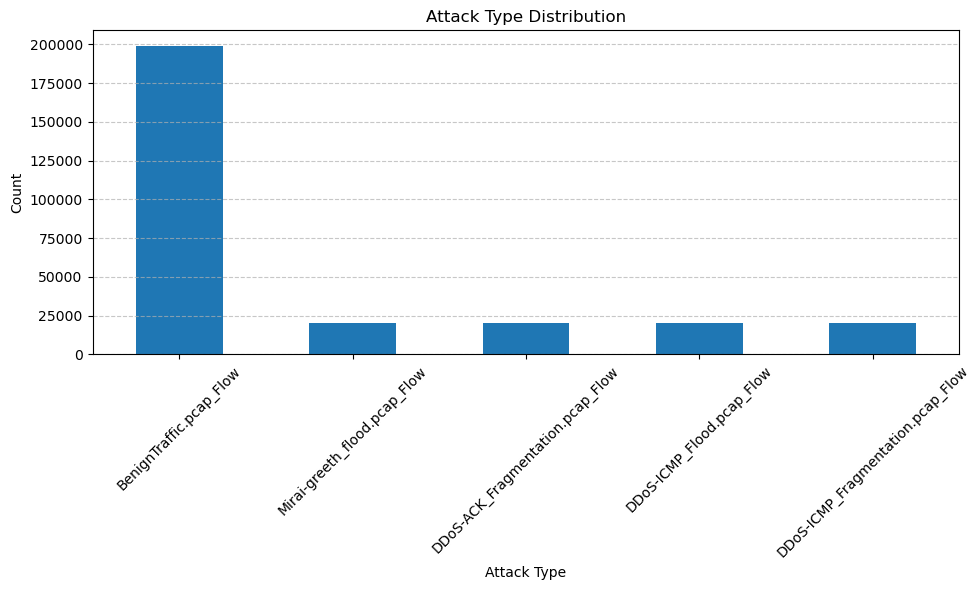

In [9]:
import matplotlib.pyplot as plt
attack_counts = df_downsampled.groupby('Attack_type').size().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
attack_counts.plot(kind='bar')
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


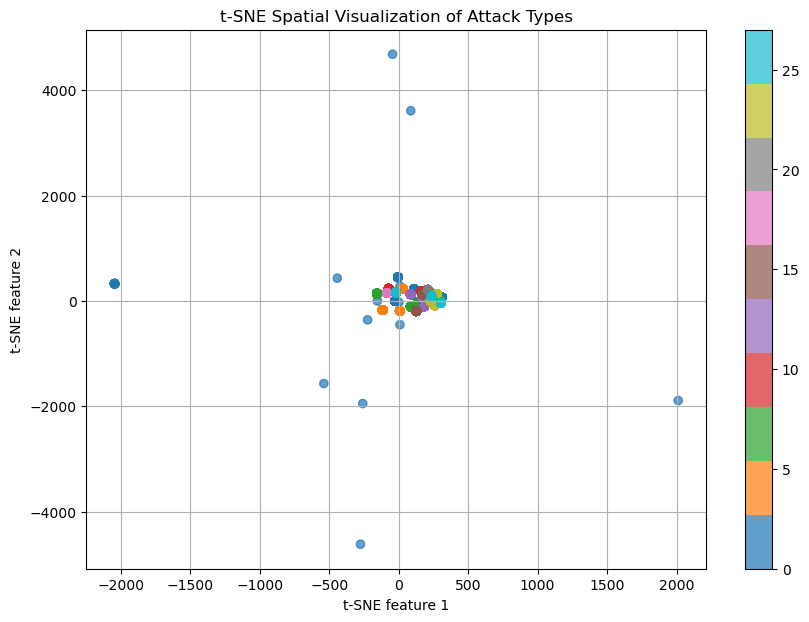

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Step 1: One-Hot Encode Attack Types
# Assuming df_downsampled is your dataframe and 'Attack_type' is categorical
attack_types = df_downsampled['Attack_type']

# One-hot encode the 'Attack_type' column
one_hot_encoded = pd.get_dummies(attack_types, drop_first=False)

# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # You can tune perplexity if needed
X_tsne = tsne.fit_transform(one_hot_encoded)

# Step 3: Plot the results
# Map the attack types to numerical labels for color coding
labelencoder = LabelEncoder()
attack_labels = labelencoder.fit_transform(attack_types)

# Plot the t-SNE result
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=attack_labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE Spatial Visualization of Attack Types')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.grid(True)
plt.show()


In [13]:
df_downsampled.columns.tolist()

['Unnamed: 0',
 'ID',
 'id.orig_p',
 'id.resp_p',
 'proto',
 'service',
 'timestamp',
 'flow_duration',
 'fwd_pkts_tot',
 'bwd_pkts_tot',
 'fwd_data_pkts_tot',
 'bwd_data_pkts_tot',
 'fwd_pkts_per_sec',
 'bwd_pkts_per_sec',
 'flow_pkts_per_sec',
 'down_up_ratio',
 'fwd_header_size_tot',
 'fwd_header_size_min',
 'fwd_header_size_max',
 'bwd_header_size_tot',
 'bwd_header_size_min',
 'bwd_header_size_max',
 'flow_FIN_flag_count',
 'flow_SYN_flag_count',
 'flow_RST_flag_count',
 'fwd_PSH_flag_count',
 'bwd_PSH_flag_count',
 'flow_ACK_flag_count',
 'fwd_URG_flag_count',
 'bwd_URG_flag_count',
 'flow_CWR_flag_count',
 'flow_ECE_flag_count',
 'fwd_pkts_payload.min',
 'fwd_pkts_payload.max',
 'fwd_pkts_payload.tot',
 'fwd_pkts_payload.avg',
 'fwd_pkts_payload.std',
 'bwd_pkts_payload.min',
 'bwd_pkts_payload.max',
 'bwd_pkts_payload.tot',
 'bwd_pkts_payload.avg',
 'bwd_pkts_payload.std',
 'flow_pkts_payload.min',
 'flow_pkts_payload.max',
 'flow_pkts_payload.tot',
 'flow_pkts_payload.avg',
 '

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


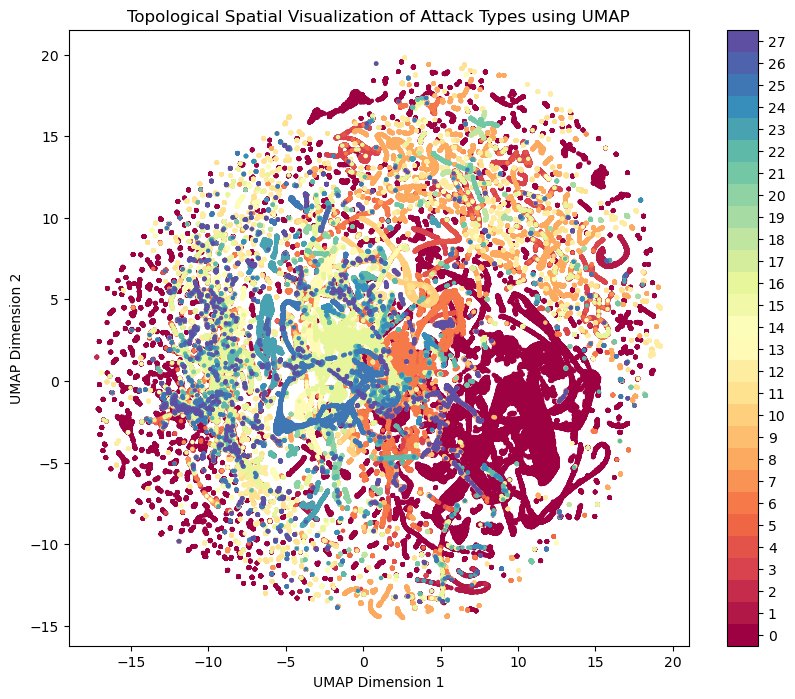

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import umap

# Separate features and target
X = df_downsampled.drop(columns=['Attack_type'])
X = X.select_dtypes(include=['number'])
y = df_downsampled['Attack_type']

# UMAP for topological spatial embedding
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# Plot the UMAP embedding
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=pd.factorize(y)[0], cmap='Spectral', s=5)
plt.colorbar(scatter, boundaries=np.arange(len(np.unique(y)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(y))))
plt.title('Topological Spatial Visualization of Attack Types using UMAP')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/xq/mk_9dpc14877s8mzs6300hv80000gn/T/ipykernel_79270/204884748.py:38: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


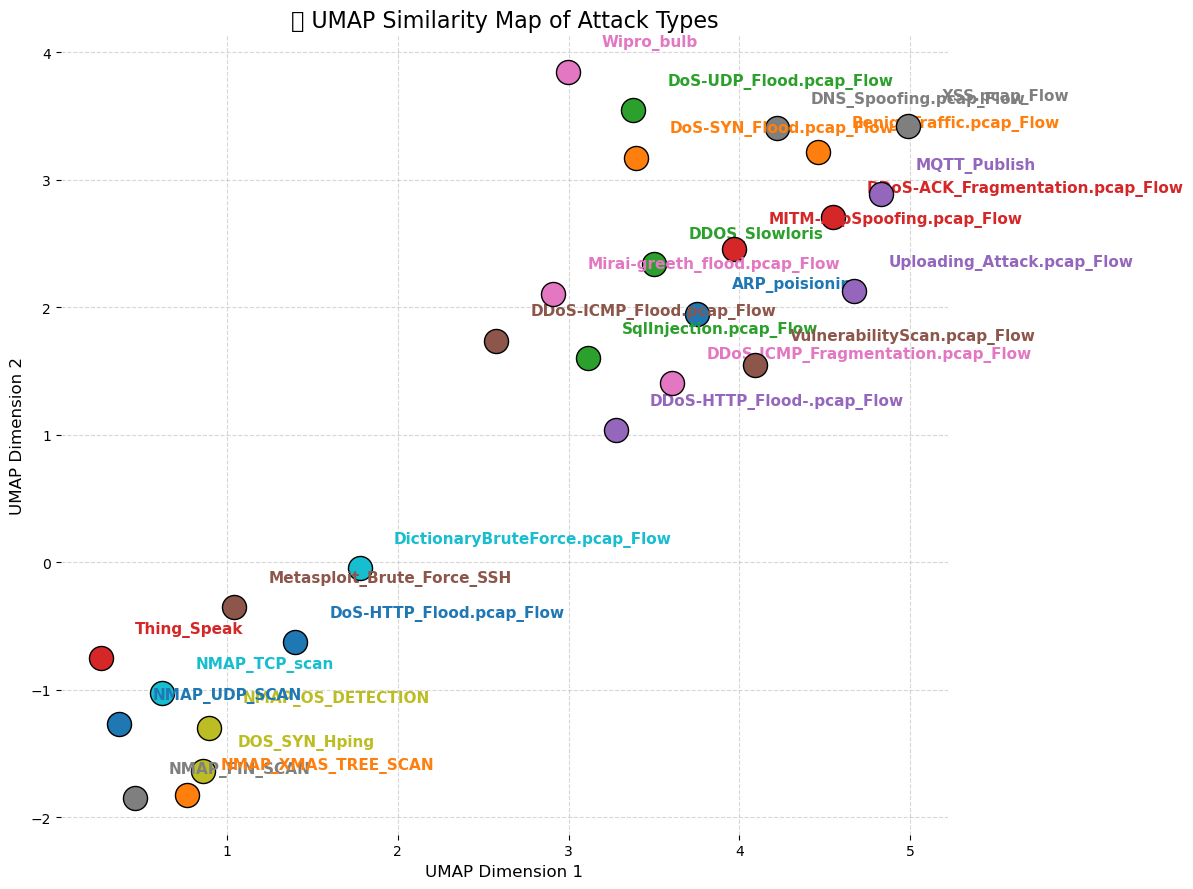

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import seaborn as sns

# 1. Prepare features and target
X = df_downsampled.drop(columns=['Attack_type'])
X = X.select_dtypes(include='number')
y = df_downsampled['Attack_type']

# 2. Compute group means
X_grouped = X.copy()
X_grouped['Attack_type'] = y
group_means = X_grouped.groupby('Attack_type').mean()

# 3. UMAP reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(group_means)

# 4. Plotting setup
plt.figure(figsize=(12, 9))
palette = sns.color_palette("tab10", n_colors=len(group_means))

# 5. Scatter plot
for i, (x, y_pos) in enumerate(embedding):
    plt.scatter(x, y_pos, s=300, color=palette[i], edgecolor='black', zorder=3)
    plt.text(x + 0.2, y_pos + 0.2, group_means.index[i], fontsize=11, weight='bold', color=palette[i])

# 6. Style and aesthetics
plt.title('🧠 UMAP Similarity Map of Attack Types', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(False)
plt.tight_layout()
plt.show()


In [81]:
!pip install kmapper

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import kmapper as km
df_sampled = df_downsampled.sample(n=1000,random_state=42)
# 1. Prepare data
X = df_sampled.drop(columns=['Attack_type'])
X = X.select_dtypes(include='number')  # Only numeric features
y = df_sampled['Attack_type']

# 2. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=1)

# 4. Project the data (using PCA here; you could also use UMAP or t-SNE)
projected = mapper.fit_transform(X_scaled, projection=PCA(n_components=2))

# 5. Create the TDA Mapper graph
graph = mapper.map(
    projected,
    X_scaled,
    clusterer=DBSCAN(eps=0.5, min_samples=5),
    cover=km.Cover(n_cubes=10, perc_overlap=0.5)
)

# 6. Visualize and save the graph
mapper.visualize(
    graph,
    path_html="tda_mapper_attack_type.html",
    title="TDA Mapper Graph on Attack Types",
    color_values=pd.factorize(y)[0],
    color_function_name='Attack Type'
)


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1000, 177)

..Projecting data using: 
	PCA(n_components=2)


..Scaling with: MinMaxScaler()

Mapping on data shaped (1000, 177) using lens shaped (1000, 2)

Creating 100 hypercubes.

Created 25 edges and 35 nodes in 0:00:00.127019.
Wrote visualization to: tda_mapper_attack_type.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>TDA Mapper Graph on Attack Types | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 

In [71]:
df_downsampled = df_downsampled.drop(columns=['Unnamed: 0'])

In [67]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Make sure X is numeric
X = df_downsampled.drop(columns=['Attack_type'])
X = X.select_dtypes(include='number')

# Encode categorical target to numeric
y = df_downsampled['Attack_type']
y_encoded = LabelEncoder().fit_transform(y)

# Compute mutual information
mi = mutual_info_classif(X, y_encoded, discrete_features='auto', random_state=42)

# Create a Series for readability
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# Display top features
print(mi_scores.head(10))


Unnamed: 0                       2.218758
fwd_last_window_size_payload     1.572123
fwd_last_window_size             1.517404
active_cycle                     1.414715
active.tot                       1.413102
fwd_bwd_header_size_max_ratio    1.333676
active_events                    1.328181
fwd_bwd_header_size_min_ratio    1.255160
fwd_header_data_ratio            1.160318
flow_pkts_size.avg               1.068676
dtype: float64


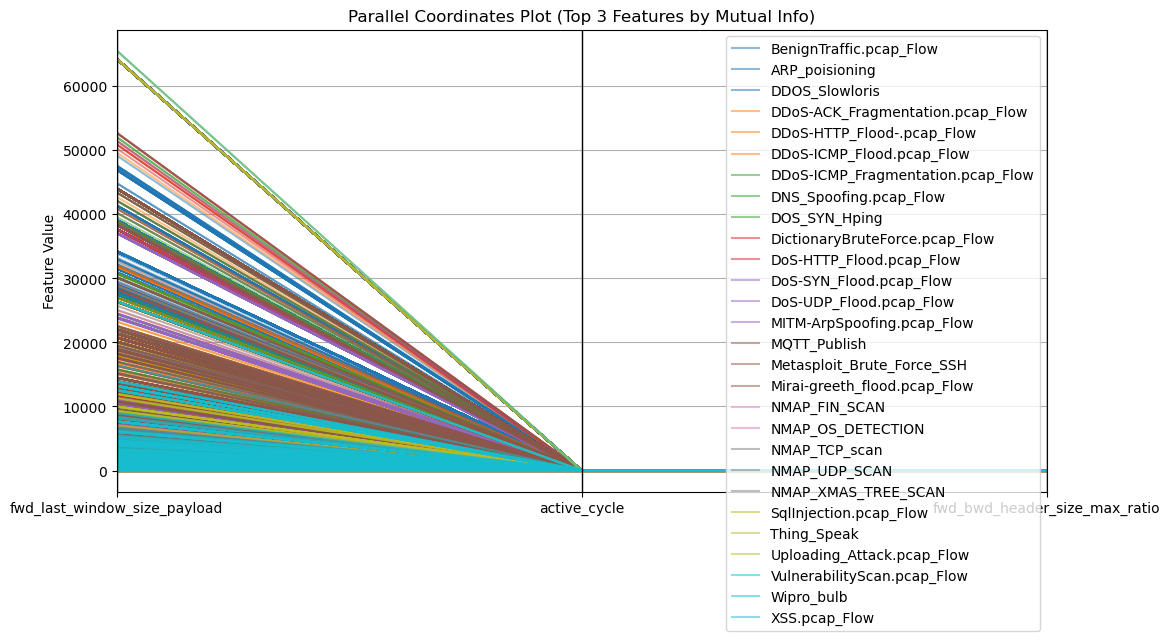

In [23]:
from pandas.plotting import parallel_coordinates
# 5. Create DataFrame for plotting

df_plot = df_downsampled[['fwd_last_window_size_payload','active_cycle','fwd_bwd_header_size_max_ratio','Attack_type']]

# 6. Plot parallel coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(df_plot, class_column='Attack_type', colormap='tab10', alpha=0.5)
plt.title('Parallel Coordinates Plot (Top 3 Features by Mutual Info)')
plt.ylabel('Feature Value')
plt.grid(True)
plt.show()